In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv('lendingClub/loan_data.csv')

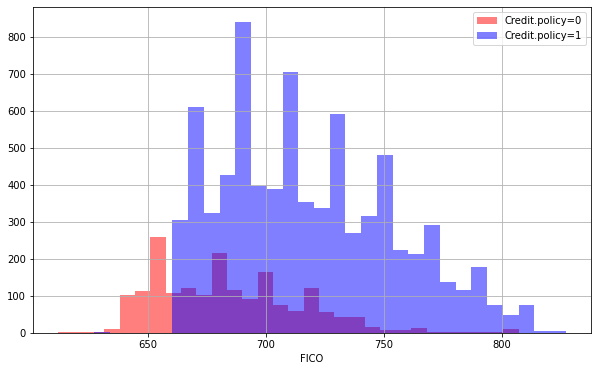

In [3]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.policy=0')
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.policy=1')
plt.xlabel('FICO')
plt.legend()

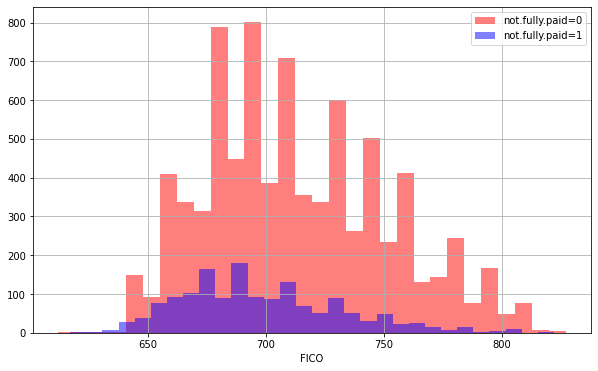

In [4]:
plt.figure(figsize=(10,6))
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
plt.xlabel('FICO')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

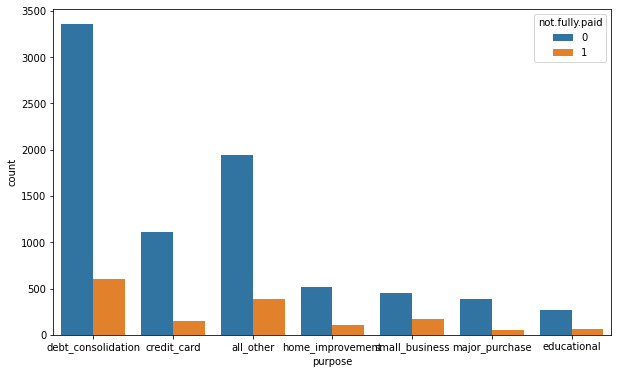

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x=loan_data['purpose'],hue=loan_data['not.fully.paid'])

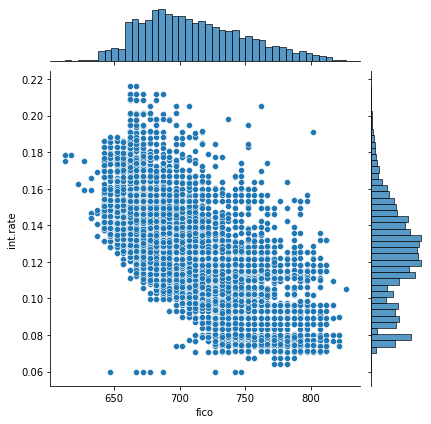

In [6]:
sns.jointplot(x='fico',y='int.rate',data=loan_data)

<Figure size 720x432 with 0 Axes>

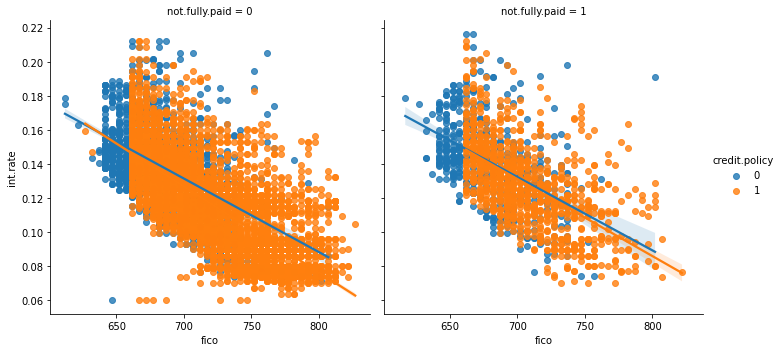

In [7]:
plt.figure(figsize=(10,6))
sns.lmplot(x='fico',y='int.rate',data=loan_data,hue='credit.policy',col='not.fully.paid')

In [8]:
loans = pd.get_dummies(data=loan_data,columns=['purpose'],drop_first=True)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(loans.drop(['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business'],axis=1))



StandardScaler()

In [10]:
scaled_loans= scaler.transform(loans.drop(['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business'],axis=1))

df = pd.DataFrame(scaled_loans,columns=loans.columns[1:12])
df.head()



,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003


In [11]:
final_data= pd.concat([df,loans[['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business']]],axis=1)
final_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit.policy,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,1,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,1,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,1,0,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,1,0,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,1,0,1,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid',axis=1)
y =final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



In [13]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

prediction = dtree.predict(X_test)

pd.DataFrame({'label':y_test,'Predictions':prediction}).head()



,label,Predictions
5244,0,0
1739,0,1
2780,0,0
7062,0,1
6661,0,0


In [14]:
print("Decision Tree Score: ", dtree.score(X_test,y_test))
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))



Decision Tree Score:  0.7313848295059151
[[2002  429]
 [ 343  100]]


In [15]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier()

pred = rfc.predict(X_test)

pd.DataFrame({'Label':y_test,'Predictions':pred}).head()



,Label,Predictions
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0


In [18]:
print("Random Forest Score: ", rfc.score(X_test,y_test))
print(confusion_matrix(y_test,pred))

Random Forest Score:  0.8469032707028532
[[2420   11]
 [ 429   14]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874

